# Метод главных компонент

![](pca.gif)

![](pca.png)

### Как определить разброс данных?

![](var.png)

Будем использовать матрицу ковариаций.

$$
\Sigma = 
\begin{pmatrix}
  \sigma^2(x_1)& cov(x_1, x_2)& \ldots& cov(x_1, x_l)\\
  cov(x_2, x_1)& \sigma^2(x_2)& \ldots& cov(x_2, x_l)\\
   \ldots& \ldots& \ldots &  \ldots\\
  cov(x_l, x_1)& cov(x_l, x_2)& \ldots& \sigma^2(x_l)
\end{pmatrix}
$$

Пусть $X$ - исходная выборка ($l\times n$), $v$ - единичный вектор размера $n$.

Проекция $X$ на $v$ равна $v^TX$. Как найти $v$, на котором достигается максимум $Var(v^TX)$?

$$
Var(v^TX) = v^T\Sigma v
$$


[Оказывается](https://en.wikipedia.org/wiki/Rayleigh_quotient#Formulation_using_Lagrange_multipliers), что критические точки - это собственные вектора матрицы $\Sigma$. 

Собственный вектор для матрицы $A$ - вектор $x$ такой, что $Ax=\lambda x$. Число $\lambda$ называется собственным значением.

Свойства матрицы ковариации (как положительно определенной симметрической матрицы):
* она имеет положительные собственные значения;
* собственные векторы, соответствующие разным собственным значениям, ортогональны друг другу;
* из её собственных векторов всегда можно составить ортонормированный базис;
* матрицу $A$ можно привести к диагональному виду: $A = VLV^{T}$, где $V$ — ортогональная матрица, столбцы которой содержат ортонормированный базис из собственных векторов, а $L$ — диагональная матрица с собственными значениями матрицы $A$ на диагонали.

Пусть $X$ - **центрированная** *матрица объект-признак* размера $(l\times n)$. 

**PCA**

Запишем *матрицу ковариаций* $C=X^TX\big/(l-1)$. Она симметрична, поэтому ее можно представить в виде:
$$
C = VLV^T,
$$
где $V$ - *матрица собственных векторов* матрицы *C* (записаны по столбцам), где $L$ - диагональная *матрица собственных значений*, причем значения расположены в убывающем порядке.    
Столбцы матрицы $V$ называются *главными направлениями*.     
Проекции исходных данных на эти направления называются *главными компонентами* - их можно рассматривать как новые переменные.    
$j$-ая главная компонента есть $j$-ый столбец матрицы $XV$.    
Новые координаты $i$-ого объекта есть $i$-ая строка матрицы $XV$.



In [10]:
import numpy as np
import scipy as sp
from scipy import misc
import matplotlib.pyplot as plt
# from PIL import Image
# import imageio
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA, TruncatedSVD
%matplotlib inline
np.set_printoptions(precision=4, suppress=True)

In [11]:
def plot_sample(X, eigenvectors=None):
    plt.figure(figsize=(4, 4))
    plt.scatter(*X.T, s=3)
    X_min, X_max = np.min(X), np.max(X)
    plt.xlim(X_min - 0.2, X_max + 0.2)
    plt.ylim(X_min - 0.2, X_max + 0.2)
    if eigenvectors is not None:
        for i, (vector, color) in enumerate(zip(eigenvectors.T, ('r', 'b'))):
            if vector[1] < 0: vector *= -1
            max_t = min(abs(X_max / vector))
            parameter = np.linspace(0, max_t, 100)
            plt.plot(
                parameter * vector[0],
                parameter * vector[1],
                lw=3, c=color, label='{}-th eigenvector'.format(i + 1)
            )
        plt.legend()

In [12]:
def create_sample(l=200, with_mean=True, with_std=False, show=True):
    np.random.seed(1)
    mu = np.array([2.0, 10.0])
    r = np.array([
        [10.00, 3.00],
        [3.00, 2.00]
    ])
    X = np.random.multivariate_normal(mu, r, size=l)
    X = scale(X, with_mean=with_mean, with_std=with_std, copy=False)
    plot_sample(X)
    return X

In [13]:
def decompose(X):
    C = X.T.dot(X) / (len(X) - 1)
    print('Covariance matrix\n{}'.format(C))
    L, V = np.linalg.eig(C)
    L_sort, V_sort_T = map(np.array, zip(*sorted(zip(L, V.T), key=lambda x: -x[0])))
    V_sort = V_sort_T.T
    print('Sorted eigenvalues\n{}'.format(L_sort))
    print('Sorted eigenvectors\n{}'.format(V_sort))
    C_restored = V_sort.dot(np.diag(L_sort)).dot(V_sort.T)
    print('Restored C\n{}'.format(C_restored))
    L_approxed = L_sort.copy()
    L_approxed[L_approxed < 0.5 * np.median(L_approxed)] = 0
    C_approxed = V_sort.dot(np.diag(L_approxed)).dot(V_sort.T)
    print('Approxed C\n{}'.format(C_approxed))
    return V_sort

In [14]:
def plot_covariance(X):
    C = X.T.dot(X) / (len(X) - 1)
    plt.figure(figsize=(8, 8))
    ax = plt.imshow(C, cmap='jet')
    plt.xticks(np.arange(len(C)))
    plt.yticks(np.arange(len(C)))
    plt.tick_params(top='off', bottom='off', labelbottom='off', labeltop='on', left='off')
    plt.colorbar(ax)

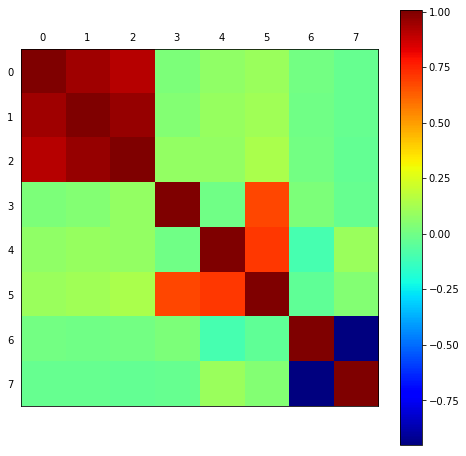

In [6]:
l = 200
feature_a = np.random.random(l)
feature_b = feature_a + np.random.random(l) / 3
feature_c = feature_b + np.random.random(l) / 3
feature_d = np.random.random(l)
feature_e = np.random.random(l)
feature_f = feature_d + feature_e + np.random.random(l) / 3
feature_g = np.random.random(l)
feature_h = -feature_g + np.random.random(l) / 3
X = np.vstack((
    feature_a, feature_b, feature_c, feature_d,
    feature_e, feature_f, feature_g, feature_h
)).T
X = scale(X)
plot_covariance(X)

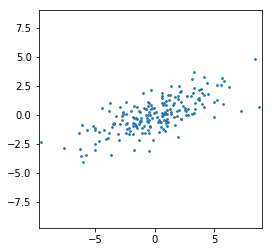

In [15]:
X = create_sample()

Covariance matrix
[[ 9.3271  3.1786]
 [ 3.1786  2.1476]]
Sorted eigenvalues
[ 10.5321   0.9426]
Sorted eigenvectors
[[ 0.9351 -0.3545]
 [ 0.3545  0.9351]]
Restored C
[[ 9.3271  3.1786]
 [ 3.1786  2.1476]]
Approxed C
[[ 9.2086  3.491 ]
 [ 3.491   1.3235]]


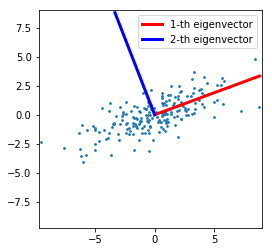

In [16]:
eigenvectors = decompose(X)
plot_sample(X, eigenvectors)

Covariance matrix
[[  12.4218   20.7188]
 [  20.7188  101.5631]]
Sorted eigenvalues
[ 106.1434    7.8415]
Sorted eigenvectors
[[-0.2159 -0.9764]
 [-0.9764  0.2159]]
Restored C
[[  12.4218   20.7188]
 [  20.7188  101.5631]]
Approxed C
[[   4.9456   22.3715]
 [  22.3715  101.1978]]


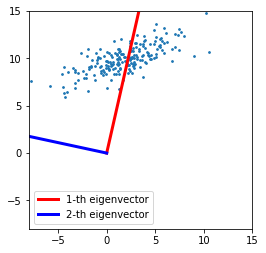

In [9]:
X = create_sample(with_mean=False, show=False)
eigenvectors = decompose(X)
plot_sample(X, eigenvectors)

Не во всех случаях PCA полезно...

![](pca_wrong.png)

**SVD**

Запишем разложение $X$.

$$
X = USV^T,
$$
где $S$ - матрица сингулярных значений. В этом случае *матрица главных компонент* есть $XV = US$.
SVD-разложение связано с PCA следующим образом:

$$
C = (USV^T)^T(USV^T)\big/(l-1) = V\frac{S^2}{l-1}V^T,
$$
поэтому
$$
\lambda_i=\frac{s_i^2}{l-1}
$$

![](svd.gif)

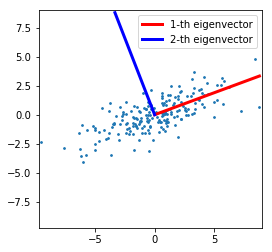

In [11]:
X = create_sample(show=False)
U, s, Vt = sp.linalg.svd(X)
U = U[:, :2]
plot_sample(X, Vt.T)

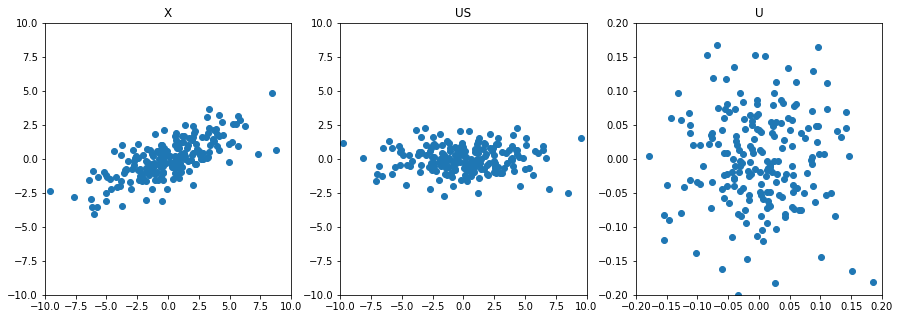

In [16]:
X = create_sample(show=False)
U, s, Vt = sp.linalg.svd(X)
Us = X.dot(np.linalg.inv(Vt))
f, axarr = plt.subplots(1, 3, figsize=(15, 5));

axarr[0].scatter(X[:, 0], X[:, 1]);
axarr[0].set_xlim((-10, 10)); axarr[0].set_ylim((-10, 10)); axarr[0].set_title('X')

axarr[1].scatter(Us[:, 0], Us[:, 1]);
axarr[1].set_xlim((-10, 10)); axarr[1].set_ylim((-10, 10)); axarr[1].set_title('US')

axarr[2].scatter(U[:, 0], U[:, 1]);
axarr[2].set_xlim((-0.2, 0.2)); axarr[2].set_ylim((-0.2, 0.2)); axarr[2].set_title('U');

![](svd1.png)

![](svd2.png)

![](svd3.png)

Итак, есть два способа сделать PCA:

1) ища собственные значения и векторы,<br>
2) с помощью SVD-разложения.

Последнее вычислительно более устойчиво.

В sklearn есть два разных класса:

1) [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)<br>
2) [TruncatedSVD](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html)<br>

PCA работает с матрица ковариаций, центрирует ее и применяет к ней SVD-разложение.

TruncatedSVD работает с исходной матрицей, не центрирует ее. Поэтому он эффективен в случае разреженных матриц.

In [17]:
X = create_sample(show=False) + 100
feature_c = np.random.random(l)
X = np.hstack((X, feature_a.reshape(-1, 1)))
for data, name in zip((X, scale(X, with_mean=True, with_std=False)), ('non-centered', 'centered')):
    print('{}\n{}'.format(30 * '=', name))
    for method in (PCA(n_components=2), TruncatedSVD(n_components=2)):
        method.fit(data)
        print(method.__class__.__name__)
        print(method.components_)

non-centered
PCA
[[-0.935  -0.3545 -0.0085]
 [ 0.3545 -0.9351  0.0022]]
TruncatedSVD
[[ 0.7072  0.707   0.0033]
 [ 0.7069 -0.7072  0.0106]]
centered
PCA
[[-0.935  -0.3545 -0.0085]
 [ 0.3545 -0.9351  0.0022]]
TruncatedSVD
[[-0.935  -0.3545 -0.0085]
 [ 0.3545 -0.9351  0.0022]]


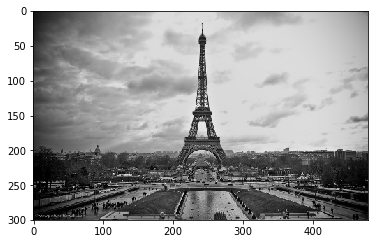

In [18]:
%matplotlib inline
img = imageio.imread(r'france.jpg')
imgplot = plt.imshow(img, cmap='Greys_r')
img = np.array(img[:, :, 0])

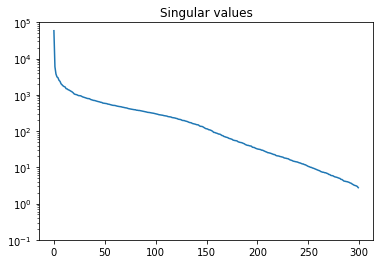

In [19]:
U, s, Vh = sp.linalg.svd(img)
plt.plot(s)
plt.yscale('log')
plt.ylim(10**(-1), 10**5)
plt.title('Singular values');

In [20]:
def str_range(some_range):
    return str(some_range[0] + 1) + '-' + str(some_range[-1] + 1)

def get_components(comp_range):
    A = np.zeros(img.shape)
    for i in comp_range:
        A += np.outer(U[:, i] * s[i], Vh[i, :])
    return A

comp_ranges = \
    [
        np.arange(0, 1),
        np.arange(0, 5),
        np.arange(0, 10),
        np.arange(0, 20), 
        np.arange(0, 60),
        np.arange(0, len(s)),
        np.arange(19, 100), 
        np.arange(19, len(s)),
        np.arange(99, len(s))
    ]

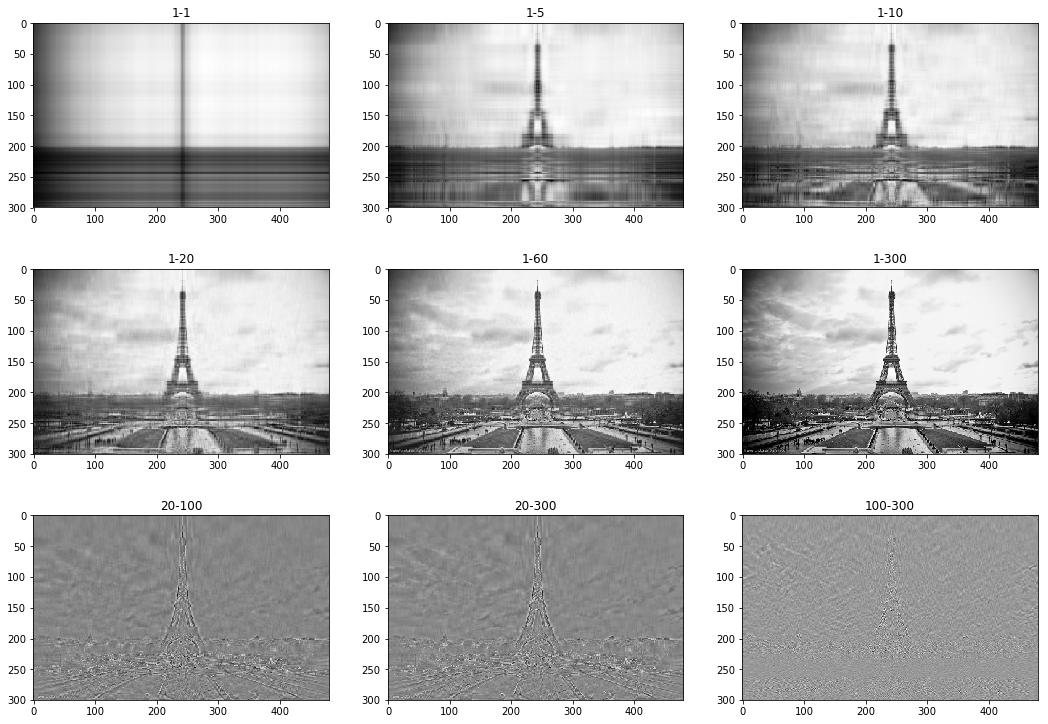

In [21]:
fig = plt.figure(figsize=(18, 40))
for i, comp_range in enumerate(comp_ranges):
    ax = fig.add_subplot(len(comp_ranges), 3, i + 1)
    ax.set_title(str_range(comp_range))
    A = get_components(comp_range)
    plt.imshow(A, cmap='Greys_r')